In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [60]:
boston=load_boston()

In [61]:
feature = pd.DataFrame(boston.data,columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["Target"])

In [62]:
data= pd.concat([feature,target],axis=1)

In [63]:
correlation=data.corr("pearson")

In [64]:
abs(correlation["Target"]).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

In [65]:
X=data["RM"]
Y=data["Target"]
Z=data["LSTAT"]

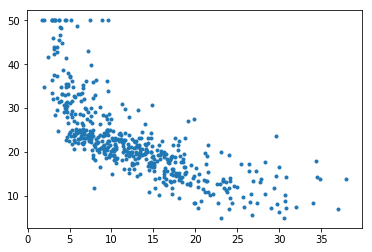

In [66]:
plt.plot(Z,Y,'.')

In [67]:
X=(X-X.min())/(X.max()-X.min())
Y=(Y-Y.min())/(Y.max()-Y.min())
Z=(Z-Z.min())/(Z.max()-Z.min())

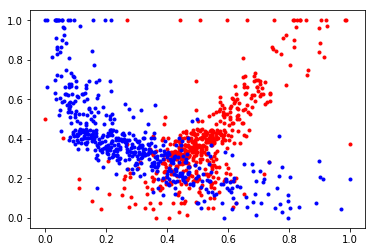

In [68]:
plt.plot(X,Y,'r.', Z,Y,'b.')

In [69]:
x=np.array(X)
y=np.array(Y)
z=np.array(Z)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(z,y,test_size=0.2)

In [71]:
np.power(np.e,2)

7.3890560989306495

In [72]:
def hypothesis(a,x,b):
    return a*np.exp(b*x)

In [73]:
def error(a,x,b,y):
    e=0
    m=len(x)
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b)-y[i]),2)
        
    return (1/(2*m))*e

In [74]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(x)
    
    for i in range(m):
        grad_a += (1/m)*(hypothesis(a,x[i],b)-y[i])*(np.power(np.e,b*x[i]))
        grad_b += (1/m)*(hypothesis(a,x[i],b)-y[i])*(hypothesis(a,x[i],b))*x[i]
        
    a=a-grad_a*learning_rate
    b=b-grad_b*learning_rate
        
    return a,b

In [75]:
def descent(init_a,x,init_b,y,learning_rate,iterations):
    a=init_a
    b=init_b
    
    for i in range(iterations):
        e = error(a,x,b,y)
        
        if i%1000==0:
            print(f"Error:{np.sqrt(e)},a:{a},b:{b}")
                  
        a,b = step_gradient(a,x,b,y,learning_rate)
                  
    return a,b

In [96]:
a=0.5823074269031847
b=-1.2952338677816606
learning_rate=0.001
iterations=10000

In [97]:
final_a,final_b = descent(a,x_train,b,y_train,learning_rate,iterations)

Error:0.10218036111140606,a:0.5823074269031847,b:-1.2952338677816606
Error:0.10207427917141189,a:0.5829649795219812,b:-1.2998420524898524
Error:0.10196899317272769,a:0.583619559054209,b:-1.3044305640696663
Error:0.10186449628224634,a:0.5842711839029285,b:-1.308999520622392
Error:0.10176078173298879,a:0.5849198723661819,b:-1.3135490393031286
Error:0.10165784282340498,a:0.5855656426214425,b:-1.3180792363322065
Error:0.10155567291668251,a:0.5862085127170494,b:-1.3225902270054744
Error:0.10145426544006243,a:0.5868485005677023,b:-1.327082125703948
Error:0.10135361388416247,a:0.58748562395233,b:-1.3315550459030003
Error:0.10125371180230823,a:0.5881199005133491,b:-1.3360091001812724


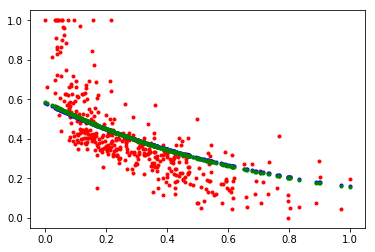

In [99]:
plt.plot(x_train,y_train, 'r.',
        x_train, hypothesis(a,x_train,b),'b.',
        x_train, hypothesis(final_a,x_train,final_b),'g.')

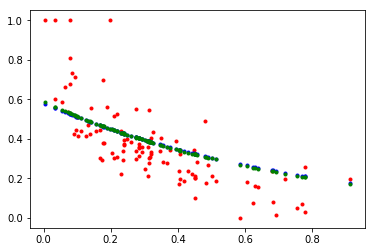

In [100]:
plt.plot(x_test,y_test, 'r.',
        x_test, hypothesis(a,x_test,b),'b.',
        x_test, hypothesis(final_a,x_test,final_b),'g.')

In [101]:
final_a,final_b

(0.5887513477567201, -1.3404444002293734)

In [102]:
y_test[:3]

array([0.36      , 0.20222222, 0.40222222])

In [103]:
hypothesis(final_a,x_test[:3],final_b)

array([0.40208273, 0.32098714, 0.38334807])

In [104]:
np.sqrt(error(final_a,x_train,final_b,y_train))

0.10115455280987126

In [105]:
np.sqrt(error(final_a,x_test,final_b,y_test))

0.10249842867471103